### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

## Basic EDA

It involves info, describe, descriptive statistics of columns.

In [2]:
tit=sns.load_dataset('titanic')

In [3]:
tit

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 1. Overview of the Dataset

### Below methods and attributes are commonly used to understand the structure and content of a DataFrame in data analysis.
1. size :  The total number of elements in the DataFrame.
2. shape : It returns (number of rows, number of columns).
3. ndim : The number of dimensions of the DataFrame. For a DataFrame, this is always 2 (rows and columns).
4. describe : Generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values. It provides metrics  like count, mean, std (standard deviation), min, 25% (first quartile), 50% (median), 75% (third quartile), and max.
5. head : Returns the first 5 rows of the DataFrame by default. 
6. tail : Returns the last 5 rows of the DataFrame by default.
7. sample : Returns a random sample of rows from the DataFrame. By default, it returns 1 random row, but you can specify the number of rows to return.

In [4]:
a=tit.size
b=tit.shape
c=tit.ndim
d=tit.describe()
e=tit.head()
f=tit.tail()
g=tit.sample()
print('Size : ',a)
print('Shape : ',b)
print('Dim : ',c)
print('Head : \n',e)
print('\nTail : \n',f)
print('\nDescribe : \n',d)
print('\nSample : \n',g)

Size :  13365
Shape :  (891, 15)
Dim :  2
Head : 
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Tail : 
      survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887 

### Descriptive statistics of categorical columns

In [5]:
tit.describe(include=['object'])

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


### Display basic information about the dataset using info()

In [6]:
print(tit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


### To check the data types of the columns using dtypes gives us only the data type

In [7]:
tit.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

## 2. Data Cleaning and Preparation

### Check for missing values

<AxesSubplot: >

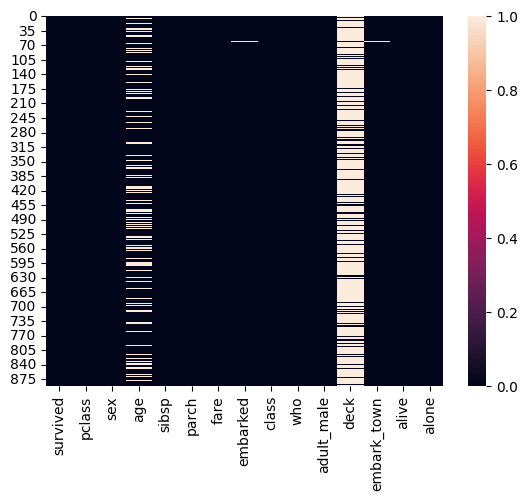

In [8]:
sns.heatmap(tit.isnull())

In [9]:
print(tit.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


### Drop rows with missing values in 'embarked' column

In [10]:
tit = tit.dropna(subset=['embarked'])

### Fill missing 'age' values with the median age

In [11]:
tit['age'].fillna(tit['age'].median(), inplace=True)

### Drop the 'deck' column due to too many missing values

In [12]:
tit.drop(columns=['deck'], inplace=True)

### Now check the missing values

In [13]:
print(tit.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


<AxesSubplot: >

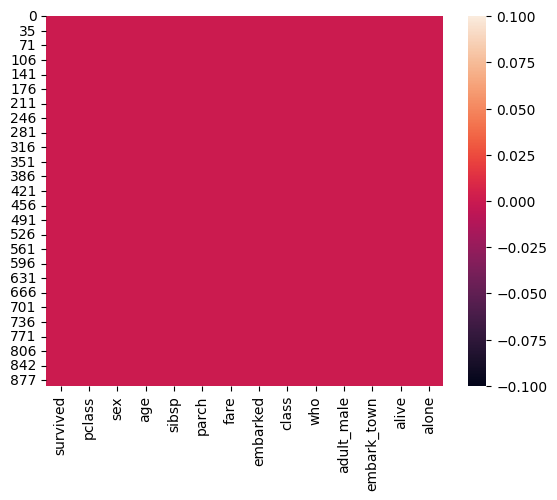

In [14]:
sns.heatmap(tit.isnull())

## 3. Data Visualization

### a. Distribution of Numerical Features

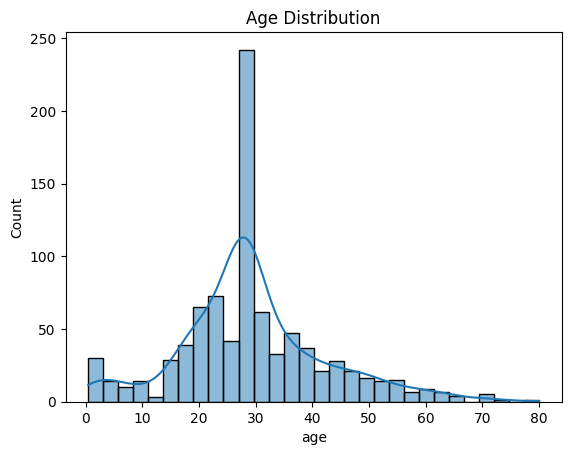

In [15]:
# Age distribution
sns.histplot(tit['age'], kde=True)
plt.title('Age Distribution')
plt.show()

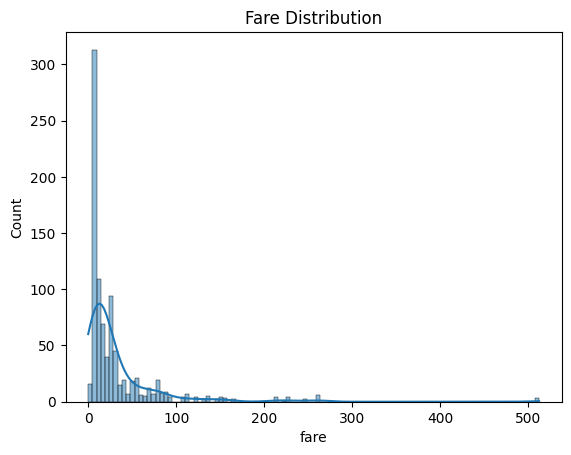

In [16]:
# Fare distribution
sns.histplot(tit['fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

### b. Categorical Features

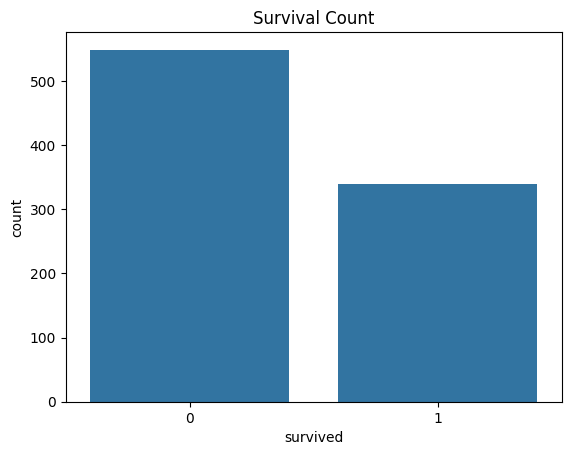

In [17]:
# Count plot of survived
sns.countplot(data=tit, x='survived')
plt.title('Survival Count')
plt.show()

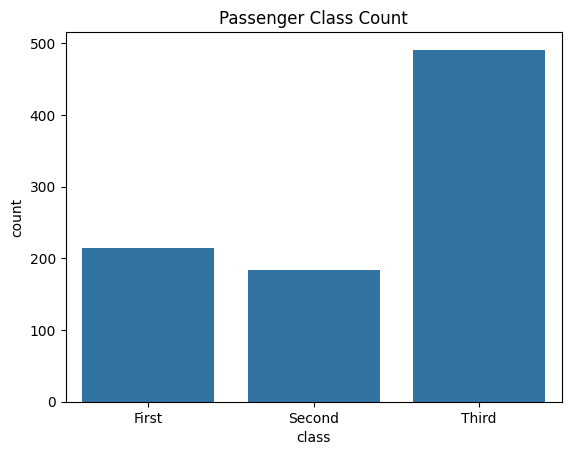

In [18]:
# Count plot of class
sns.countplot(data=tit, x='class')
plt.title('Passenger Class Count')
plt.show()

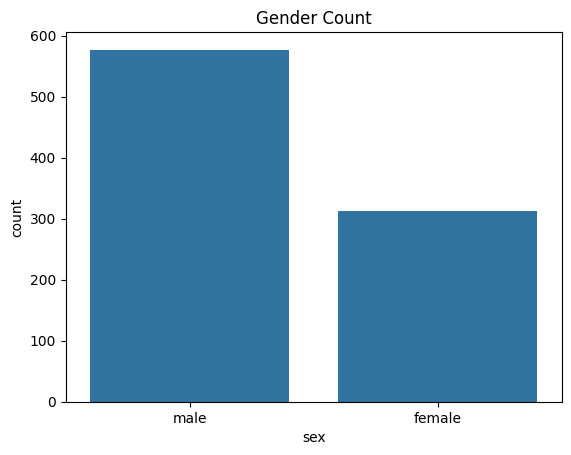

In [19]:
# Count plot of sex
sns.countplot(data=tit, x='sex')
plt.title('Gender Count')
plt.show()

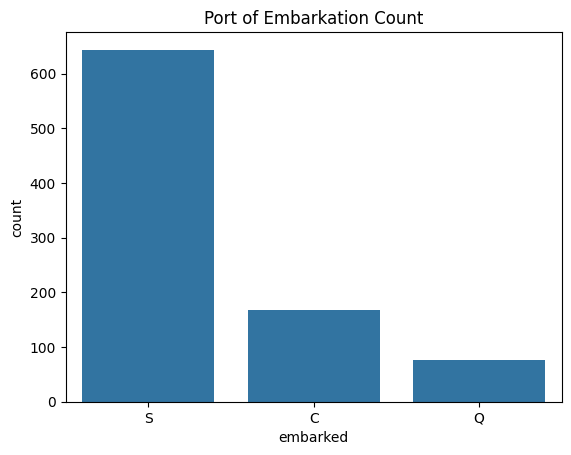

In [20]:
# Count plot of embarked
sns.countplot(data=tit, x='embarked')
plt.title('Port of Embarkation Count')
plt.show()

### c. Relationships Between Features

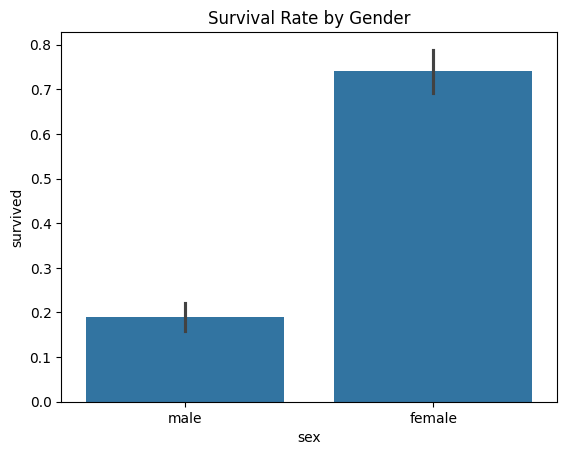

In [21]:
# Survival rate by gender
sns.barplot(data=tit, x='sex', y='survived')
plt.title('Survival Rate by Gender')
plt.show()

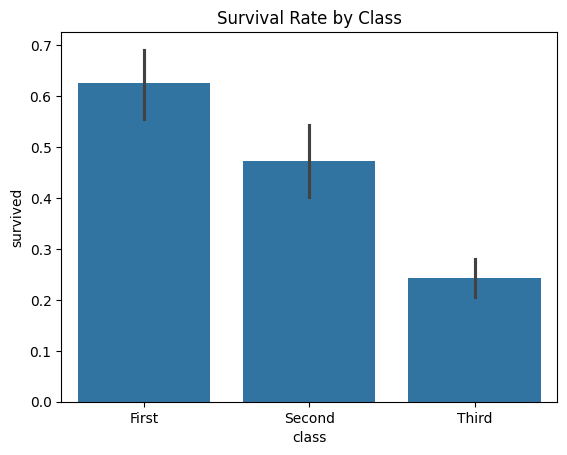

In [22]:
# Survival rate by class
sns.barplot(data=tit, x='class', y='survived')
plt.title('Survival Rate by Class')
plt.show()

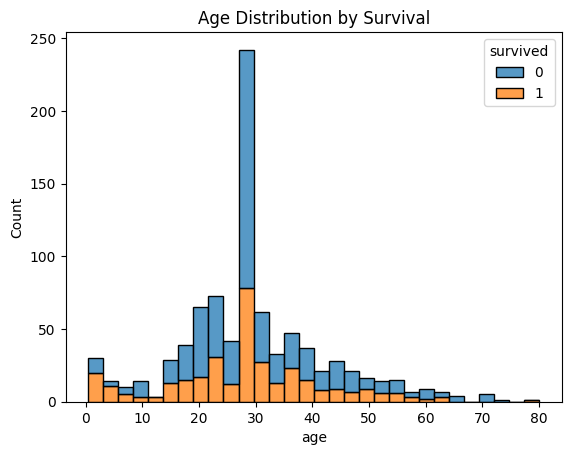

In [23]:
# Age distribution by survival
sns.histplot(data=tit, x='age', hue='survived', multiple='stack')
plt.title('Age Distribution by Survival')
plt.show()

## 4. Handling Outliers

<AxesSubplot: ylabel='fare'>

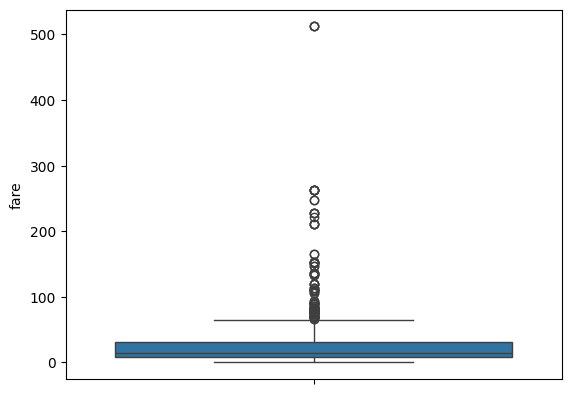

In [24]:
sns.boxplot(tit['fare'])

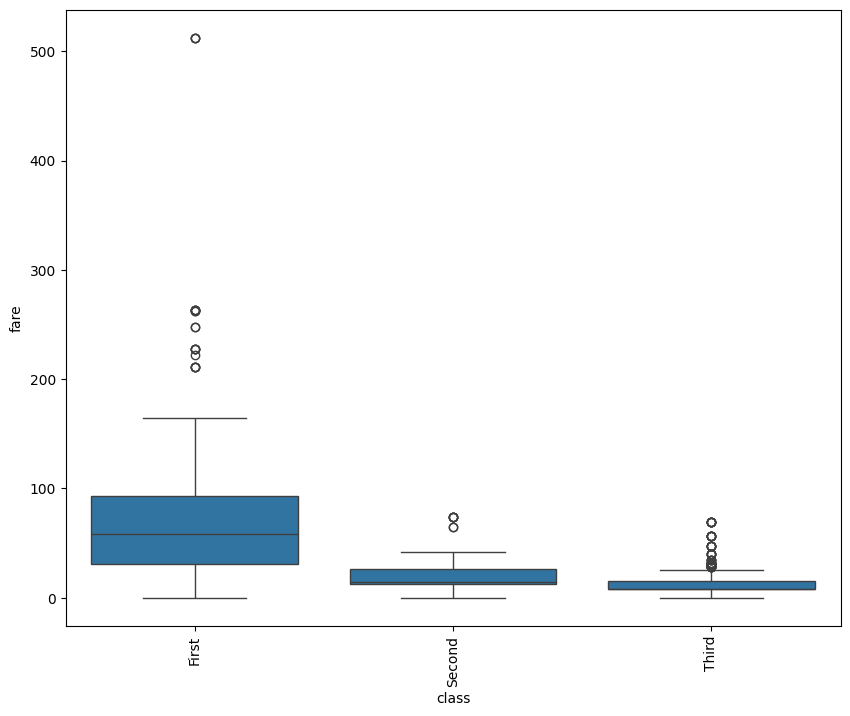

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(data=tit, x='class',y='fare')
plt.xticks(rotation=90)
plt.show()

Now we have three options:

* Those values can be dropped
* Those values can be capped
* Those values can be replaced by median/mean

## 5. Dropping outliers

In [26]:
tit_copy = tit.copy()

In [27]:
tit_copy.shape

(889, 14)

In [28]:
def dropping_outliers(tit, value):

    q1 = tit[tit['class']==value]['fare'].quantile(0.25)
    q3 = tit[tit['class']==value]['fare'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr

    tit.drop(tit[(tit['class']==value) & (tit['fare']>= upper)].index, inplace=True)
    tit.drop(tit[(tit['class']==value) & (tit['fare']<= lower)].index, inplace=True)

    return tit

In [29]:
tit_copy = dropping_outliers(tit_copy, 'First')
tit_copy.shape

(869, 14)

In [30]:
tit_copy = dropping_outliers(tit_copy, 'Second')
tit_copy.shape

(862, 14)

In [31]:
tit_copy = dropping_outliers(tit_copy, 'Third')
tit_copy.shape

(810, 14)

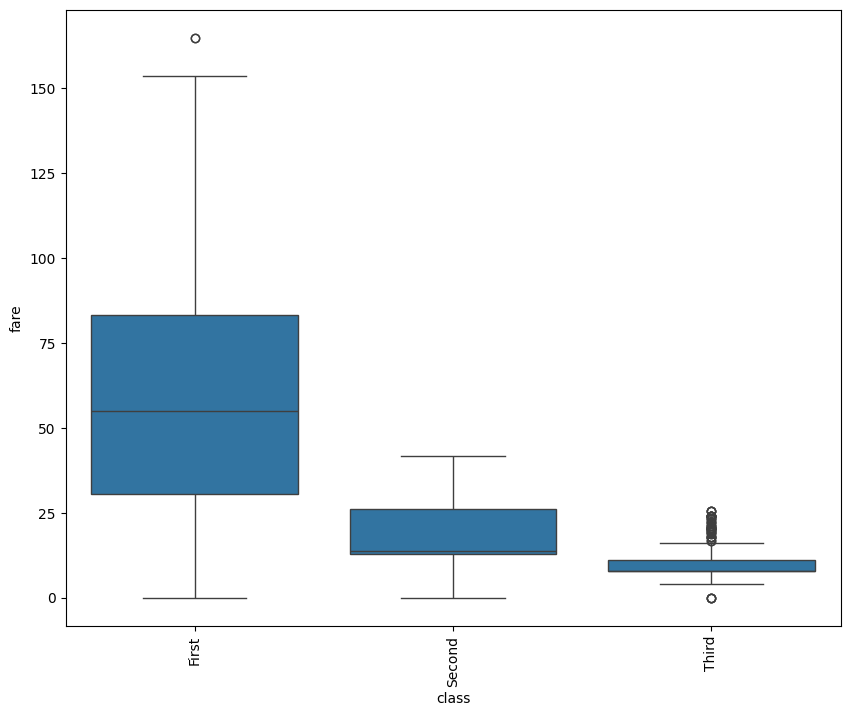

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(data=tit_copy, x='class',y='fare')
plt.xticks(rotation=90)
plt.show()

## 6. Handling Skewness

There are few options we have for handling skewness:

* Applying square root on that particular column
* Applying log transformation on that particular column

Let's separate out categorical and numerical columns

In [33]:
cat_tit = tit.select_dtypes(include=['object'])
num_tit = tit.select_dtypes(include=['float64','int64'])

In [34]:
cat_tit.head()

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no


In [35]:
num_tit.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [36]:
from scipy.stats import skew

survived
0.4837496405947267


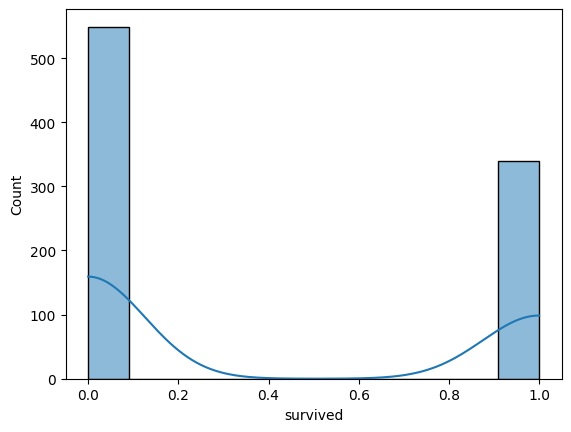

pclass
-0.635922455085956


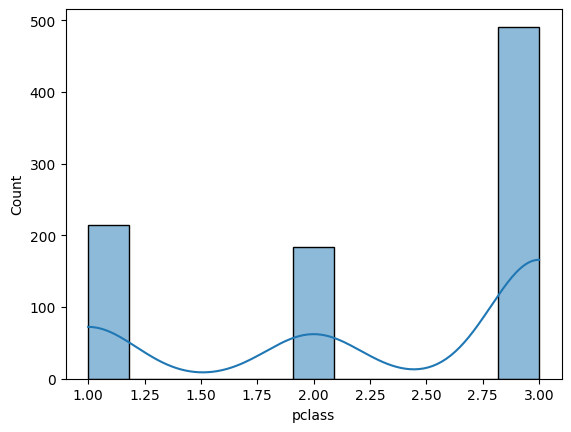

age
0.507152516392603


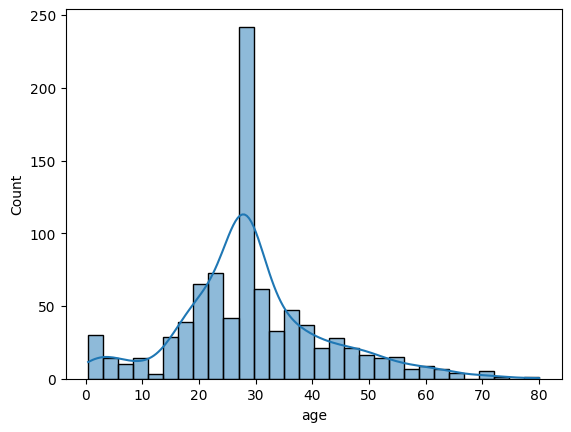

sibsp
3.6848268283144074


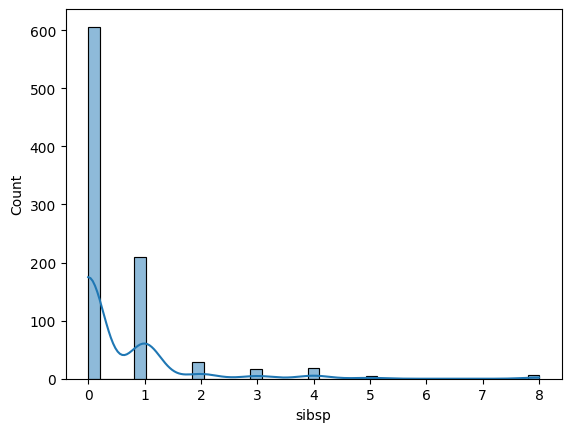

parch
2.7405260747508855


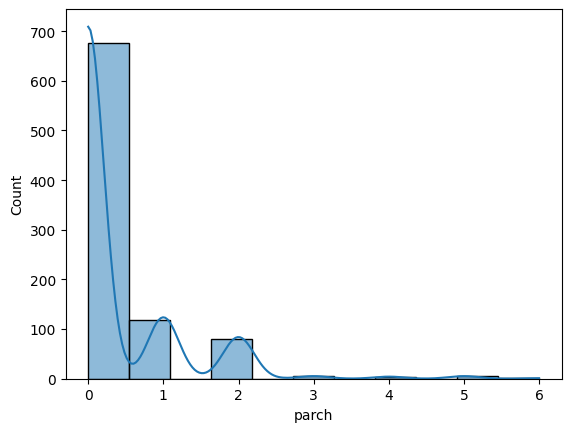

fare
4.793334993307843


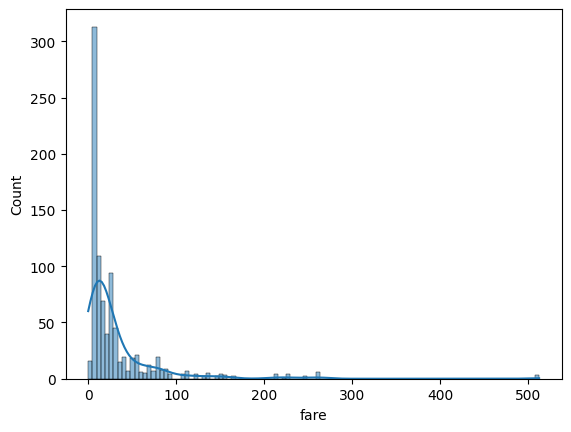

In [37]:
for col in num_tit:
    print(col)
    print(skew(num_tit[col]))

    plt.figure()
    sns.histplot(num_tit[col], kde=True)
    plt.show()

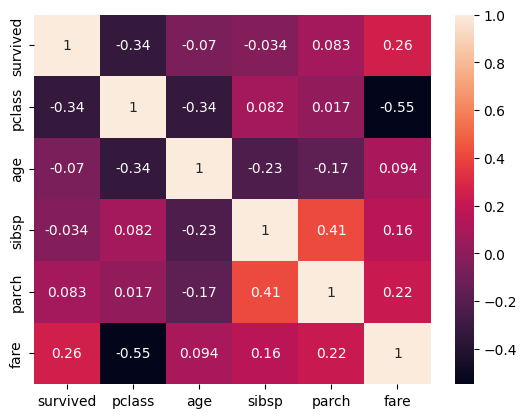

In [38]:
sns.heatmap(num_tit.corr(),annot=True)
plt.show()

### Symboling column has negative values so square root or logarithm of negative number is not defined

In [39]:
np.sqrt(-1)

nan

In [40]:
np.log(-1)

nan

## 7. Handling Categorical Data

* One hot encoding
* Label encoding

In [41]:
cat_tit.head()

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no


In [42]:
cat_tit.tail()

,sex,embarked,who,embark_town,alive
886,male,S,man,Southampton,no
887,female,S,woman,Southampton,yes
888,female,S,woman,Southampton,no
889,male,C,man,Cherbourg,yes
890,male,Q,man,Queenstown,no


In [43]:
cat_tit['sex'].value_counts()

sex
male      577
female    312
Name: count, dtype: int64

In [44]:
pd.get_dummies(cat_tit['sex'], dtype='int64')

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [45]:
pd.get_dummies(cat_tit['embarked'],dtype='int64')

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()

In [48]:
le.fit_transform(cat_tit['sex'])

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [49]:
le.fit_transform(cat_tit['embarked'])

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1,

In [50]:
for col in cat_tit:
    cat_tit[col] = le.fit_transform(cat_tit[col])

In [51]:
cat_tit.head()

,sex,embarked,who,embark_town,alive
0,1,2,1,2,0
1,0,0,2,0,1
2,0,2,2,2,1
3,0,2,2,2,1
4,1,2,1,2,0


## 8. Data Normalization or Scaling

* Min-Max Scaler
* Standardization

Let's join both categorical and numerical dataframe into single dataframe

In [52]:
final_tit = pd.concat([cat_tit,num_tit],axis=1)
final_tit.head()

,sex,embarked,who,embark_town,alive,survived,pclass,age,sibsp,parch,fare
0,1,2,1,2,0,0,3,22.0,1,0,7.2500
1,0,0,2,0,1,1,1,38.0,1,0,71.2833
2,0,2,2,2,1,1,3,26.0,0,0,7.9250
3,0,2,2,2,1,1,1,35.0,1,0,53.1000
4,1,2,1,2,0,0,3,35.0,0,0,8.0500


### Min-Max Scaler

### $x_{\text{new}} = \frac{{x_{\text{old}} - x_{\text{min}}}}{{x_{\text{max}} - x_{\text{min}}}}$

In [53]:
def minmax(array):
    array_new = (array - array.min())/(array.max() - array.min())
    return array_new

In [54]:
minmax(final_tit)

,sex,embarked,who,embark_town,alive,survived,pclass,age,sibsp,parch,fare
0,1.0,1.0,0.5,1.0,0.0,0.0,1.0,0.271174,0.125,0.000000,0.014151
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.472229,0.125,0.000000,0.139136
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.321438,0.000,0.000000,0.015469
3,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.434531,0.125,0.000000,0.103644
4,1.0,1.0,0.5,1.0,0.0,0.0,1.0,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,1.0,0.5,1.0,0.0,0.0,0.5,0.334004,0.000,0.000000,0.025374
887,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.233476,0.000,0.000000,0.058556
888,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.346569,0.125,0.333333,0.045771
889,1.0,0.0,0.5,0.0,1.0,1.0,0.0,0.321438,0.000,0.000000,0.058556


In [55]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
transformed_array = mx.fit_transform(final_tit)
new_tit = pd.DataFrame(transformed_array, columns=list(final_tit.columns))
new_tit.head()

,sex,embarked,who,embark_town,alive,survived,pclass,age,sibsp,parch,fare
0,1.0,1.0,0.5,1.0,0.0,0.0,1.0,0.271174,0.125,0.0,0.014151
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.472229,0.125,0.0,0.139136
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.321438,0.000,0.0,0.015469
3,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.434531,0.125,0.0,0.103644
4,1.0,1.0,0.5,1.0,0.0,0.0,1.0,0.434531,0.000,0.0,0.015713


## 9. Standardization

### $z = \frac{{x - \text{mean}}}{{\text{standard deviation}}}$

In [56]:
def standard_scaler(array):
    new_array = (array - array.mean())/array.std()
    return new_array

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
transformed_array = sc.fit_transform(final_tit)
new_tit = pd.DataFrame(transformed_array, columns=list(final_tit.columns))
new_tit.head()

,sex,embarked,who,embark_town,alive,survived,pclass,age,sibsp,parch,fare
0,0.735342,0.586840,-0.352559,0.586840,-0.786961,-0.786961,0.825209,-0.563674,0.431350,-0.474326,-0.500240
1,-1.359911,-1.939555,1.332520,-1.939555,1.270711,1.270711,-1.572211,0.669217,0.431350,-0.474326,0.788947
2,-1.359911,0.586840,1.332520,0.586840,1.270711,1.270711,0.825209,-0.255451,-0.475199,-0.474326,-0.486650
3,-1.359911,0.586840,1.332520,0.586840,1.270711,1.270711,-1.572211,0.438050,0.431350,-0.474326,0.422861
4,0.735342,0.586840,-0.352559,0.586840,-0.786961,-0.786961,0.825209,0.438050,-0.475199,-0.474326,-0.484133


## 10. Feature Engineering

Creating new feature out of existing features

In [58]:
new_tit.head()

,sex,embarked,who,embark_town,alive,survived,pclass,age,sibsp,parch,fare
0,0.735342,0.586840,-0.352559,0.586840,-0.786961,-0.786961,0.825209,-0.563674,0.431350,-0.474326,-0.500240
1,-1.359911,-1.939555,1.332520,-1.939555,1.270711,1.270711,-1.572211,0.669217,0.431350,-0.474326,0.788947
2,-1.359911,0.586840,1.332520,0.586840,1.270711,1.270711,0.825209,-0.255451,-0.475199,-0.474326,-0.486650
3,-1.359911,0.586840,1.332520,0.586840,1.270711,1.270711,-1.572211,0.438050,0.431350,-0.474326,0.422861
4,0.735342,0.586840,-0.352559,0.586840,-0.786961,-0.786961,0.825209,0.438050,-0.475199,-0.474326,-0.484133


In [59]:
new_tit['log_fare'] = np.log1p(new_tit['fare'])
new_tit.head()

,sex,embarked,who,embark_town,alive,survived,pclass,age,sibsp,parch,fare,log_fare
0,0.735342,0.586840,-0.352559,0.586840,-0.786961,-0.786961,0.825209,-0.563674,0.431350,-0.474326,-0.500240,-0.693627
1,-1.359911,-1.939555,1.332520,-1.939555,1.270711,1.270711,-1.572211,0.669217,0.431350,-0.474326,0.788947,0.581627
2,-1.359911,0.586840,1.332520,0.586840,1.270711,1.270711,0.825209,-0.255451,-0.475199,-0.474326,-0.486650,-0.666797
3,-1.359911,0.586840,1.332520,0.586840,1.270711,1.270711,-1.572211,0.438050,0.431350,-0.474326,0.422861,0.352670
4,0.735342,0.586840,-0.352559,0.586840,-0.786961,-0.786961,0.825209,0.438050,-0.475199,-0.474326,-0.484133,-0.661907


### Splitting feature and target 

In [60]:
x=final_tit.iloc[:, 1:]
y=final_tit.iloc[:, -11]

In [61]:
# Features
x

,embarked,who,embark_town,alive,survived,pclass,age,sibsp,parch,fare
0,2,1,2,0,0,3,22.0,1,0,7.2500
1,0,2,0,1,1,1,38.0,1,0,71.2833
2,2,2,2,1,1,3,26.0,0,0,7.9250
3,2,2,2,1,1,1,35.0,1,0,53.1000
4,2,1,2,0,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,2,1,2,0,0,2,27.0,0,0,13.0000
887,2,2,2,1,1,1,19.0,0,0,30.0000
888,2,2,2,0,0,3,28.0,1,2,23.4500
889,0,1,0,1,1,1,26.0,0,0,30.0000


In [62]:
# Target
y

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: sex, Length: 889, dtype: int32

## 11. Splitting the dataset into the Training set and Test set

In [63]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [65]:
ypred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0])

## 12. To calculate Accuracy score, Confusion matrix, Classification report

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"Accuracy:{ac}\n{cm}\n\n{cr}")

Accuracy:0.9250936329588015
[[ 82  15]
 [  5 165]]

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        97
           1       0.92      0.97      0.94       170

    accuracy                           0.93       267
   macro avg       0.93      0.91      0.92       267
weighted avg       0.93      0.93      0.92       267



### seperate calculation of confusion matrix

In [67]:
from sklearn.metrics import classification_report,confusion_matrix
tn,fp,fn,tp=confusion_matrix(ytest,ypred).ravel()
print(tp,fn)
print(fp,tn)

165 5
15 82


In [68]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy_score(ytest,ypred)

0.9250936329588015

### fraction of predicated positive event Precision = TP / TP + FP

In [69]:
precision_score(ytest,ypred)

0.9166666666666666

### sensitivity Recall = TP/ TP + FN

In [70]:
recall_score(ytest,ypred)

0.9705882352941176

### harmonic mean of recall and precision

In [71]:
f1_score(ytest,ypred)

0.9428571428571428